# Анализ данных по COVID-19

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# загрузка данных
data = pd.read_csv('covid_19_data.csv')
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
data.shape

(156292, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156292 entries, 0 to 156291
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              156292 non-null  int64  
 1   ObservationDate  156292 non-null  object 
 2   Province/State   111979 non-null  object 
 3   Country/Region   156292 non-null  object 
 4   Last Update      156292 non-null  object 
 5   Confirmed        156292 non-null  float64
 6   Deaths           156292 non-null  float64
 7   Recovered        156292 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 9.5+ MB


In [5]:
# проверка ключей
data.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [6]:
# удаление ненужных столбцов по ключам

# 1 способ (с присвоением в переменную)
data = data.drop(['SNo', 'Last Update'], axis=1)

# 2 способ (без присвоения в переменную)
# data.drop(['SNo', 'Last Update'], axis=1, inplace=True)
data.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0


In [7]:
# проверка на дубликаты
data.duplicated(['ObservationDate', 'Country/Region', 'Province/State']).sum()

4

In [8]:
# удаление дубликатов
data = data.drop_duplicates(['ObservationDate', 'Country/Region', 'Province/State'])

In [9]:
# повторная проверка на дубликаты
data.duplicated(['ObservationDate', 'Country/Region', 'Province/State']).sum()

0

In [10]:
# изучение страны
country_array = data['Country/Region'].unique()

for country in np.sort(country_array):
    print(country)

 Azerbaijan
('St. Martin',)
Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burma
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Cape Verde
Cayman Islands
Central African Republic
Chad
Channel Islands
Chile
Colombia
Comoros
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Croatia
Cuba
Curacao
Cyprus
Czech Republic
Denmark
Diamond Princess
Djibouti
Dominica
Dominican Republic
East Timor
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Faroe Islands
Fiji
Finland
France
French Guiana
Gabon
Gambia
Gambia, The
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Grenada
Guadeloupe
Guam
Guatemala
Guernsey
Guinea
Guinea-Bissau
Guyana
Haiti
Holy See
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Ivory Coast
Jamaic

In [11]:
# изучаем Others
# применяем маскирование
data[data['Country/Region'] == 'Others']

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
933,02/07/2020,Cruise Ship,Others,61.0,0.0,0.0
1005,02/08/2020,Cruise Ship,Others,61.0,0.0,0.0
1077,02/09/2020,Diamond Princess cruise ship,Others,64.0,0.0,0.0
1143,02/10/2020,Diamond Princess cruise ship,Others,135.0,0.0,0.0
1215,02/11/2020,Diamond Princess cruise ship,Others,135.0,0.0,0.0
1286,02/12/2020,Diamond Princess cruise ship,Others,175.0,0.0,0.0
1359,02/13/2020,Diamond Princess cruise ship,Others,175.0,0.0,0.0
1433,02/14/2020,Diamond Princess cruise ship,Others,218.0,0.0,0.0
1506,02/15/2020,Diamond Princess cruise ship,Others,285.0,0.0,0.0
1578,02/16/2020,Diamond Princess cruise ship,Others,355.0,0.0,0.0


In [12]:
# приводим в порядок даты
data['ObservationDate']

0         01/22/2020
1         01/22/2020
2         01/22/2020
3         01/22/2020
4         01/22/2020
             ...    
156287    11/15/2020
156288    11/15/2020
156289    11/15/2020
156290    11/15/2020
156291    11/15/2020
Name: ObservationDate, Length: 156288, dtype: object

In [13]:
data['ObservationDate'][0]

'01/22/2020'

In [14]:
# пример метода конвертации даты
pd.to_datetime('01/22/2020').date()

datetime.date(2020, 1, 22)

In [15]:
# конвертация временных данных в тип TimeStamp
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'])
data['ObservationDate']

0        2020-01-22
1        2020-01-22
2        2020-01-22
3        2020-01-22
4        2020-01-22
            ...    
156287   2020-11-15
156288   2020-11-15
156289   2020-11-15
156290   2020-11-15
156291   2020-11-15
Name: ObservationDate, Length: 156288, dtype: datetime64[ns]

In [16]:
data['ObservationDate'][0]

Timestamp('2020-01-22 00:00:00')

In [17]:
# извлечение даты из Timestamp (исключение временных данных 00:00:00)
data['Date'] = data['ObservationDate'].apply(lambda el: el.date())


In [18]:
# пример работы метода apply()

# функция
# f = lambda x: x * 2

# s = pd.Series([10,20,30])
# s.apply(f)

In [19]:
data['Date']

0         2020-01-22
1         2020-01-22
2         2020-01-22
3         2020-01-22
4         2020-01-22
             ...    
156287    2020-11-15
156288    2020-11-15
156289    2020-11-15
156290    2020-11-15
156291    2020-11-15
Name: Date, Length: 156288, dtype: object

In [20]:
data['Date'][0]

datetime.date(2020, 1, 22)

In [21]:
data.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Date
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0,2020-01-22
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0,2020-01-22
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0,2020-01-22
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0,2020-01-22
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0,2020-01-22


In [22]:
# группировка данных по датам по всему миру
data.groupby(['Date']).sum()

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
...,...,...,...
2020-11-11,52126793.0,1284472.0,33926351.0
2020-11-12,52740580.0,1293954.0,34149223.0
2020-11-13,53365400.0,1302556.0,34450332.0


In [28]:
# Группировка данных вокруг стран и дат
total_data = data.groupby(['Country/Region', 'Date']).sum()
total_data.loc['Russia', :]

,Confirmed,Deaths,Recovered
Date,,,
2020-01-31,2.0,0.0,0.0
2020-02-01,2.0,0.0,0.0
2020-02-02,2.0,0.0,0.0
2020-02-03,2.0,0.0,0.0
2020-02-04,2.0,0.0,0.0
...,...,...,...
2020-11-11,1822345.0,31326.0,1360049.0
2020-11-12,1843678.0,31755.0,1378463.0
2020-11-13,1865395.0,32156.0,1396851.0


In [31]:
# сводные данные по отдельным странам
total_data.groupby('Country/Region').max().loc[['Russia', 'US', 'Italy'], :]

,Confirmed,Deaths,Recovered
Country/Region,,,
Russia,1910149.0,32885.0,1429565.0
US,11036935.0,246214.0,4174884.0
Italy,1178529.0,45229.0,420810.0


In [33]:
# сортировка данных
total_data.groupby('Country/Region').max().sort_values(by='Confirmed', ascending=False).loc['Australia', :]

Confirmed    27749.0
Deaths         907.0
Recovered    25468.0
Name: Australia, dtype: float64

## Визуализация

In [34]:
# группировка данных по датам по всему миру
df_by_date = data.groupby(['Date']).sum() #.reset_index()
df_by_date

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
...,...,...,...
2020-11-11,52126793.0,1284472.0,33926351.0
2020-11-12,52740580.0,1293954.0,34149223.0
2020-11-13,53365400.0,1302556.0,34450332.0


In [36]:
df_by_date.index

Index([2020-01-22, 2020-01-23, 2020-01-24, 2020-01-25, 2020-01-26, 2020-01-27,
       2020-01-28, 2020-01-29, 2020-01-30, 2020-01-31,
       ...
       2020-11-06, 2020-11-07, 2020-11-08, 2020-11-09, 2020-11-10, 2020-11-11,
       2020-11-12, 2020-11-13, 2020-11-14, 2020-11-15],
      dtype='object', name='Date', length=299)

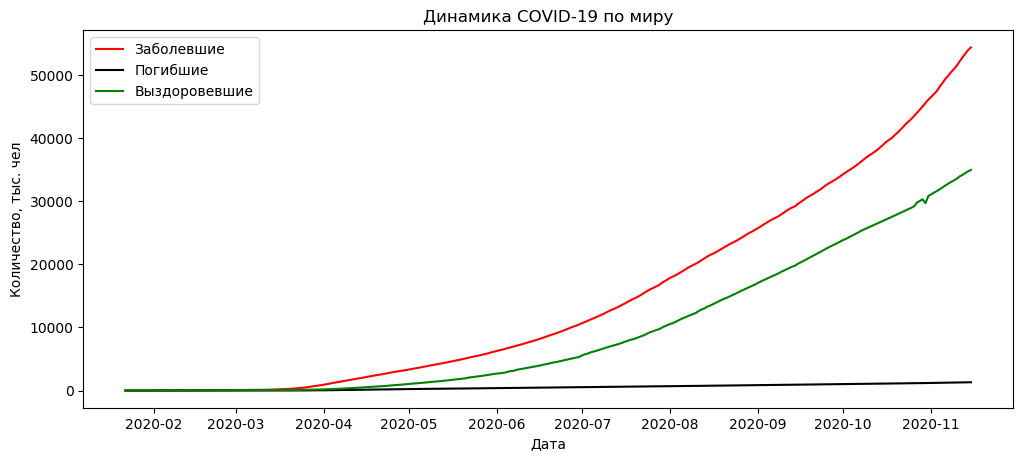

In [50]:
# Динамика пандемии по всему миру
plt.figure(dpi=100, figsize=[12.0, 5.0])

# plt.yscale('log')

plt.plot(df_by_date.index, df_by_date['Confirmed']/1000, 'r', label='Заболевшие')
plt.plot(df_by_date.index, df_by_date['Deaths']/1000, 'k', label='Погибшие')
plt.plot(df_by_date.index, df_by_date['Recovered']/1000, 'g', label='Выздоровевшие')

plt.legend()
plt.title('Динамика COVID-19 по миру')
plt.xlabel('Дата')
plt.ylabel('Количество, тыс. чел')
plt.show()

- Грубая оценка летальности

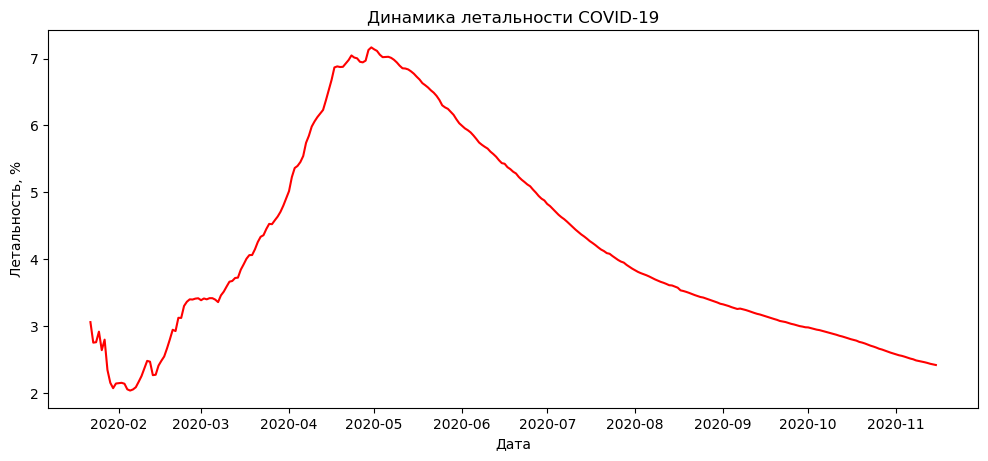

In [53]:
plt.figure(dpi=100, figsize=[12.0, 5.0])

# plt.yscale('log')

letal_data = (df_by_date['Deaths'] / df_by_date['Confirmed']) * 100

plt.plot(df_by_date.index, letal_data, 'r')

plt.title('Динамика летальности COVID-19')
plt.xlabel('Дата')
plt.ylabel('Летальность, %')
plt.show()

- Анализ новых случаев заболевания

In [54]:
df_by_date.shape

(299, 3)

In [59]:
# вычисляем каждодневные данные заболеваемости по миру


new_cases = []

for idx in range(df_by_date.shape[0]):
    if idx == 0:
        new_cases.append(df_by_date['Confirmed'][idx])
    else:
        new_cases.append(df_by_date['Confirmed'][idx] - df_by_date['Confirmed'][idx-1])
        
# new_cases

df_by_date['New cases'] = pd.Series(new_cases, index=df_by_date.index)
df_by_date

,Confirmed,Deaths,Recovered,New cases
Date,,,,
2020-01-22,555.0,17.0,28.0,555.0
2020-01-23,653.0,18.0,30.0,98.0
2020-01-24,941.0,26.0,36.0,288.0
2020-01-25,1438.0,42.0,39.0,497.0
2020-01-26,2118.0,56.0,52.0,680.0
...,...,...,...,...
2020-11-11,52126793.0,1284472.0,33926351.0,666053.0
2020-11-12,52740580.0,1293954.0,34149223.0,613787.0
2020-11-13,53365400.0,1302556.0,34450332.0,624820.0


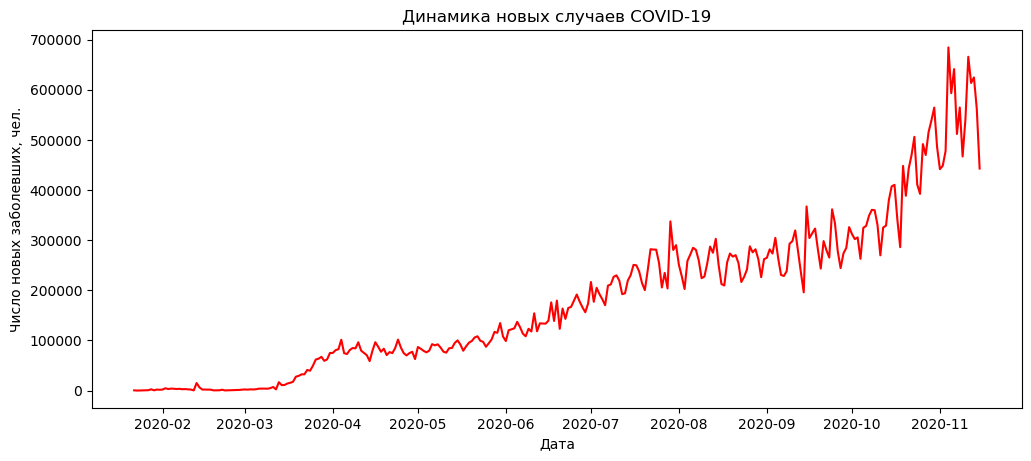

In [60]:
plt.figure(dpi=100, figsize=[12.0, 5.0])

# plt.yscale('log')

plt.plot(df_by_date.index, df_by_date['New cases'], 'r')

plt.title('Динамика новых случаев COVID-19')
plt.xlabel('Дата')
plt.ylabel('Число новых заболевших, чел.')
plt.show()